# Pregunta 2

a) Se extraen los datos del dataset, categorizando la columna "CHAS" y dividiendolo en 2 partes. 3/4 partes del dataset, serán dedicadas a entrenamiento, mientras que el 25% restante será destinado a prueba. Luego, se normalizan los datos.

In [16]:
import pandas as pd

url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"])
from sklearn.model_selection import train_test_split
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0) #extrae 1/4 del dataset de forma aleatoria para la prueba
df.shape
df.info()
df.describe()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns) # normaliza datos
y_train = X_train_scaled.pop('MEDV').values.reshape(-1,1)
X_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_test.columns) # normaliza datos
y_test = X_test_scaled.pop('MEDV').values.reshape(-1,1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
CHAS_0     506 non-null uint8
CHAS_1     506 non-null uint8
dtypes: float64(9), int64(4), uint8(2)
memory usage: 52.5 KB


b) Para esta instancia, se entrenará una red shallow con inicialización uniforme, con los datos extraídos anteriormente. A esta red se le desprenderán los gradientes antes y después del entrenamiento. Los valores se encontrarán en las variables **evaluated_gradients**(pre-entrenamiento) y **postevaluated_gradients**(post-entrenamiento).

In [18]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
### calculate gradients
from keras import backend as K
import tensorflow as tf
loss = tf.keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
# We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]
hist = model.fit(X_train_scaled, y_train, epochs=300, verbose=1, validation_data=(X_test_scaled, y_test))

# gradientes una vez terminado el entrenamiento
postloss = tf.keras.losses.mean_squared_error(model.output,y_train)
postlistOfVariableTensors = model.trainable_weights
postgradients = K.gradients(postloss, postlistOfVariableTensors)
sess = K.get_session()
postevaluated_gradients = sess.run(postgradients,feed_dict={model.input:X_train_scaled.as_matrix()})
postevaluated_gradients = [gradient/len(y_train) for gradient in postevaluated_gradients]


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 399us/step - loss: 1.0524 - val_loss: 0.9913
Epoch 2/300
379/379 [==============================] - 0s 132us/step - loss: 1.0134 - val_loss: 1.0917
Epoch 3/300
379/379 [==============================] - 0s 124us/step - loss: 1.0104 - val_loss: 0.9136
Epoch 4/300
379/379 [==============================] - 0s 121us/step - loss: 0.9186 - val_loss: 0.8953
Epoch 5/300
379/379 [==============================] - 0s 124us/step - loss: 0.8956 - val_loss: 0.8724
Epoch 6/300
379/379 [==============================] - 0s 127us/step - loss: 0.8781 - val_loss: 0.8576
Epoch 7/300
379/379 [==============================] - 0s 116us/step - loss: 0.8644 - val_loss: 0.8542
Epoch 8/300
379/379 [==============================] - 0s 121us/step - loss: 0.8485 - val_loss: 0.7861
Epoch 9/300
379/379 [==============================] - 0s 124us/step - loss: 0.7623 - val_loss: 0.8213
Epoch 10/300
379/379 [=====

379/379 [==============================] - 0s 116us/step - loss: 0.2544 - val_loss: 0.3961
Epoch 80/300
379/379 [==============================] - 0s 116us/step - loss: 0.2527 - val_loss: 0.3949
Epoch 81/300
379/379 [==============================] - 0s 132us/step - loss: 0.2572 - val_loss: 0.3923
Epoch 82/300
379/379 [==============================] - 0s 116us/step - loss: 0.2526 - val_loss: 0.3915
Epoch 83/300
379/379 [==============================] - 0s 132us/step - loss: 0.2618 - val_loss: 0.3996
Epoch 84/300
379/379 [==============================] - 0s 140us/step - loss: 0.2518 - val_loss: 0.4317
Epoch 85/300
379/379 [==============================] - 0s 121us/step - loss: 0.2502 - val_loss: 0.4158
Epoch 86/300
379/379 [==============================] - 0s 132us/step - loss: 0.2534 - val_loss: 0.3974
Epoch 87/300
379/379 [==============================] - 0s 119us/step - loss: 0.2574 - val_loss: 0.3898
Epoch 88/300
379/379 [==============================] - 0s 124us/step - loss:

379/379 [==============================] - 0s 127us/step - loss: 0.2467 - val_loss: 0.3721
Epoch 158/300
379/379 [==============================] - 0s 121us/step - loss: 0.2421 - val_loss: 0.3714
Epoch 159/300
379/379 [==============================] - 0s 121us/step - loss: 0.2518 - val_loss: 0.3711
Epoch 160/300
379/379 [==============================] - 0s 121us/step - loss: 0.2488 - val_loss: 0.4079
Epoch 161/300
379/379 [==============================] - 0s 127us/step - loss: 0.2430 - val_loss: 0.4065
Epoch 162/300
379/379 [==============================] - 0s 121us/step - loss: 0.2390 - val_loss: 0.3814
Epoch 163/300
379/379 [==============================] - 0s 121us/step - loss: 0.2452 - val_loss: 0.3715
Epoch 164/300
379/379 [==============================] - 0s 121us/step - loss: 0.2406 - val_loss: 0.3707
Epoch 165/300
379/379 [==============================] - 0s 116us/step - loss: 0.2423 - val_loss: 0.3710
Epoch 166/300
379/379 [==============================] - 0s 129us/ste

379/379 [==============================] - 0s 116us/step - loss: 0.2433 - val_loss: 0.3624
Epoch 236/300
379/379 [==============================] - 0s 121us/step - loss: 0.2361 - val_loss: 0.3818
Epoch 237/300
379/379 [==============================] - 0s 114us/step - loss: 0.2454 - val_loss: 0.3687
Epoch 238/300
379/379 [==============================] - 0s 116us/step - loss: 0.2514 - val_loss: 0.3630
Epoch 239/300
379/379 [==============================] - 0s 129us/step - loss: 0.2388 - val_loss: 0.3729
Epoch 240/300
379/379 [==============================] - 0s 119us/step - loss: 0.2475 - val_loss: 0.3909
Epoch 241/300
379/379 [==============================] - 0s 116us/step - loss: 0.2446 - val_loss: 0.3710
Epoch 242/300
379/379 [==============================] - 0s 119us/step - loss: 0.2466 - val_loss: 0.3611
Epoch 243/300
379/379 [==============================] - 0s 127us/step - loss: 0.2443 - val_loss: 0.3616
Epoch 244/300
379/379 [==============================] - 0s 119us/ste

Luego de entrenar, se realizan histogramas de los gradientes obtenidos de cada variable en la capa oculta.

Gradientes antes de entrenar:


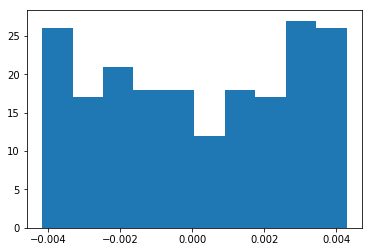

Gradientes despues de entrenar:


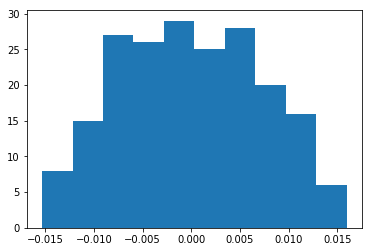

Comparacion de ambos gradientes:


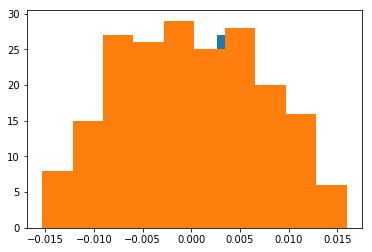

In [19]:
import matplotlib.pyplot as plt
print("Gradientes antes de entrenar:")
plt.hist(evaluated_gradients[1])
plt.show()
print("Gradientes despues de entrenar:")
plt.hist(postevaluated_gradients[1])
plt.show()
print("Comparacion de ambos gradientes:")
plt.hist(evaluated_gradients[1])
plt.hist(postevaluated_gradients[1])
plt.show()

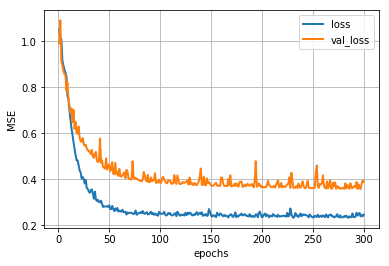

In [20]:
listaloss = []
listaval = []
for i in range(300):
    listaloss.append(hist.history['loss'][i])
    listaval.append(hist.history['val_loss'][i])

plt.plot(range(301)[1:],listaloss,label='loss', linewidth=2)
plt.plot(range(301)[1:],listaval,label='val_loss', linewidth=2)

plt.legend(['loss', 'val_loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.grid(1)
plt.show()

De los gráficos se puede abstraer que los gradientes obtenidos después del entrenamiento, se encuentran en su mayoría cerca del valor 0 (-0.015, 0.015]. Por lo que se puede asumir que la variación de esta disminuirá acorde avanza el tiempo y por consiguiente el aprendizaje no mejorará a un gran ritmo. Por lo que estamos presentes a un caso de "gradientes desvanecientes", esto se reafirma debido a que la pérdida no sigue disminuyendo al mismo ritmo después de los 100 epochs.

c) Ahora, se modela una red con 5 capas ocultas cuyas funciones de activación seran sigmoidales e inicializadas mediante una distribución uniforme, donde se realizarán los mismos procedimientos que en la sección anterior.

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 647us/step - loss: 1.0038 - val_loss: 0.9605
Epoch 2/300
379/379 [==============================] - 0s 166us/step - loss: 1.0026 - val_loss: 0.9623
Epoch 3/300
379/379 [==============================] - 0s 161us/step - loss: 1.0025 - val_loss: 0.9597
Epoch 4/300
379/379 [==============================] - 0s 156us/step - loss: 1.0014 - val_loss: 0.9577
Epoch 5/300
379/379 [==============================] - 0s 166us/step - loss: 1.0029 - val_loss: 0.9580
Epoch 6/300
379/379 [==============================] - 0s 158us/step - loss: 1.0028 - val_loss: 0.9588
Epoch 7/300
379/379 [==============================] - 0s 164us/step - loss: 1.0039 - val_loss: 0.9593
Epoch 8/300
379/379 [==============================] - 0s 161us/step - loss: 1.0028 - val_loss: 0.9578
Epoch 9/300
379/379 [==============================] - 0s 156us/step - loss: 1.0031 - val_loss: 0.9578
Epoch 10/300
379/379 [=====

379/379 [==============================] - 0s 174us/step - loss: 1.0025 - val_loss: 0.9577
Epoch 80/300
379/379 [==============================] - 0s 161us/step - loss: 1.0045 - val_loss: 0.9592
Epoch 81/300
379/379 [==============================] - 0s 174us/step - loss: 1.0013 - val_loss: 0.9598
Epoch 82/300
379/379 [==============================] - 0s 161us/step - loss: 1.0008 - val_loss: 0.9577
Epoch 83/300
379/379 [==============================] - 0s 156us/step - loss: 1.0023 - val_loss: 0.9590
Epoch 84/300
379/379 [==============================] - 0s 177us/step - loss: 1.0071 - val_loss: 0.9584
Epoch 85/300
379/379 [==============================] - 0s 153us/step - loss: 1.0010 - val_loss: 0.9588
Epoch 86/300
379/379 [==============================] - 0s 158us/step - loss: 1.0058 - val_loss: 0.9584
Epoch 87/300
379/379 [==============================] - 0s 158us/step - loss: 1.0030 - val_loss: 0.9602
Epoch 88/300
379/379 [==============================] - 0s 164us/step - loss:

379/379 [==============================] - 0s 164us/step - loss: 1.0041 - val_loss: 0.9588
Epoch 158/300
379/379 [==============================] - 0s 158us/step - loss: 1.0048 - val_loss: 0.9580
Epoch 159/300
379/379 [==============================] - 0s 161us/step - loss: 1.0067 - val_loss: 0.9584
Epoch 160/300
379/379 [==============================] - 0s 169us/step - loss: 1.0007 - val_loss: 0.9581
Epoch 161/300
379/379 [==============================] - 0s 161us/step - loss: 1.0041 - val_loss: 0.9577
Epoch 162/300
379/379 [==============================] - 0s 153us/step - loss: 1.0034 - val_loss: 0.9577
Epoch 163/300
379/379 [==============================] - 0s 158us/step - loss: 1.0030 - val_loss: 0.9592
Epoch 164/300
379/379 [==============================] - 0s 164us/step - loss: 1.0057 - val_loss: 0.9581
Epoch 165/300
379/379 [==============================] - 0s 158us/step - loss: 1.0058 - val_loss: 0.9612
Epoch 166/300
379/379 [==============================] - 0s 158us/ste

379/379 [==============================] - 0s 164us/step - loss: 1.0042 - val_loss: 0.9583
Epoch 236/300
379/379 [==============================] - 0s 158us/step - loss: 1.0027 - val_loss: 0.9577
Epoch 237/300
379/379 [==============================] - 0s 158us/step - loss: 1.0072 - val_loss: 0.9594
Epoch 238/300
379/379 [==============================] - 0s 164us/step - loss: 1.0020 - val_loss: 0.9577
Epoch 239/300
379/379 [==============================] - 0s 151us/step - loss: 1.0047 - val_loss: 0.9600
Epoch 240/300
379/379 [==============================] - 0s 158us/step - loss: 1.0031 - val_loss: 0.9602
Epoch 241/300
379/379 [==============================] - 0s 172us/step - loss: 1.0033 - val_loss: 0.9577
Epoch 242/300
379/379 [==============================] - 0s 158us/step - loss: 1.0022 - val_loss: 0.9594
Epoch 243/300
379/379 [==============================] - 0s 164us/step - loss: 1.0016 - val_loss: 0.9585
Epoch 244/300
379/379 [==============================] - 0s 153us/ste

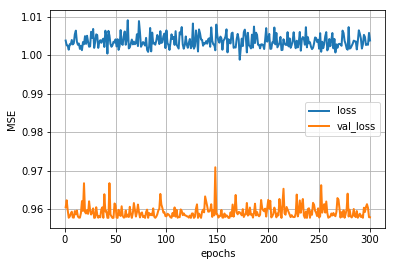

In [22]:
model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(100,  kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(50, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(25, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
### calculate gradients
loss = tf.keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
# We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

hist = model.fit(X_train_scaled, y_train, epochs=300, verbose=1, validation_data=(X_test_scaled, y_test))

# Comportamiento del error durante el tiempo
listaloss = []
listaval = []
for i in range(300):
    listaloss.append(hist.history['loss'][i])
    listaval.append(hist.history['val_loss'][i])

plt.plot(range(301)[1:],listaloss,label='loss', linewidth=2)
plt.plot(range(301)[1:],listaval,label='val_loss', linewidth=2)

plt.legend(['loss', 'val_loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.grid(1)
plt.show()


# gradientes una vez terminado el entrenamiento
postloss = tf.keras.losses.mean_squared_error(model.output,y_train)
postlistOfVariableTensors = model.trainable_weights
postgradients = K.gradients(postloss, postlistOfVariableTensors)
sess = K.get_session()
postevaluated_gradients = sess.run(postgradients,feed_dict={model.input:X_train_scaled.as_matrix()})
postevaluated_gradients = [gradient/len(y_train) for gradient in postevaluated_gradients]

A continuación, se realizarán los gráficos de la 2da,3ra,4ta y ultima capa oculta de la red.

Gradientes antes de entrenar(ultima capa oculta):


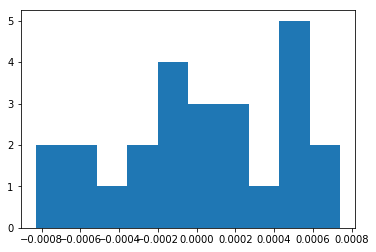

Gradientes despues de entrenar(ultima capa oculta):


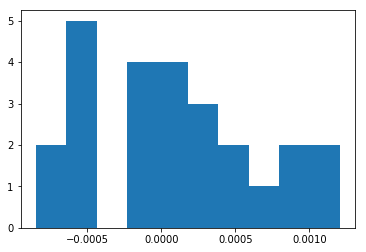

In [23]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[9])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[9])
plt.show()

Gradientes antes de entrenar(4ta capa oculta):


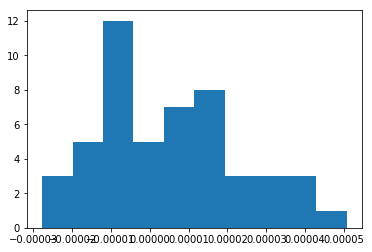

Gradientes despues de entrenar(4ta capa oculta):


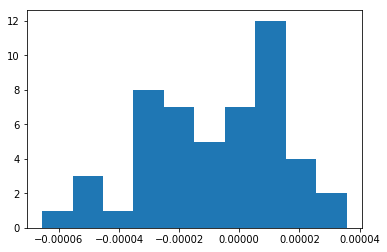

In [24]:
print("Gradientes antes de entrenar(4ta capa oculta):")
plt.hist(evaluated_gradients[7])
plt.show()
print("Gradientes despues de entrenar(4ta capa oculta):")
plt.hist(postevaluated_gradients[7])
plt.show()

Gradientes antes de entrenar(3ra capa oculta):


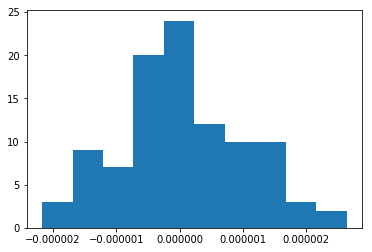

Gradientes despues de entrenar(3ra capa oculta):


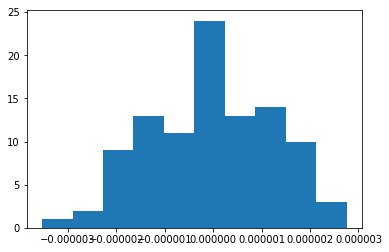

In [25]:
print("Gradientes antes de entrenar(3ra capa oculta):")
plt.hist(evaluated_gradients[5])
plt.show()
print("Gradientes despues de entrenar(3ra capa oculta):")
plt.hist(postevaluated_gradients[5])
plt.show()

Gradientes antes de entrenar(2da capa oculta):


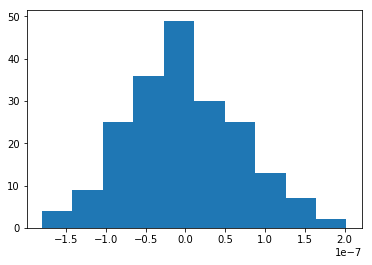

Gradientes despues de entrenar(2da capa oculta):


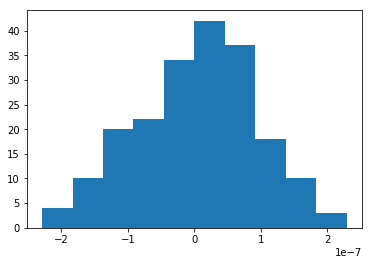

In [26]:
print("Gradientes antes de entrenar(2da capa oculta):")
plt.hist(evaluated_gradients[3])
plt.show()
print("Gradientes despues de entrenar(2da capa oculta):")
plt.hist(postevaluated_gradients[3])
plt.show()

De acuerdo a los gráficos, se deduce que las primeras capas ocultas son las que mas tienden al fenómeno de los "gradientes desvanecientes" tanto antes como después del entrenamiento en comparación a capas mas profundas. El efecto se hace mas notable previo al entrenamiento, como se puede apreciar en el gráfico de mas arriba, correspondiente a la 2da capa. Debido a que estamos presente a este fenómeno, la red no mejora su rendimiento en comparación a la pérdida.

d) En este ítem, se replanteará la situación anterior, con la sutil diferencia en la que la inicialización se hará de acuerdo a la distribución de Glorot/Xavier.

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 903us/step - loss: 1.2298 - val_loss: 0.9618
Epoch 2/300
379/379 [==============================] - 0s 164us/step - loss: 1.0055 - val_loss: 0.9577
Epoch 3/300
379/379 [==============================] - 0s 158us/step - loss: 1.0041 - val_loss: 0.9584
Epoch 4/300
379/379 [==============================] - 0s 166us/step - loss: 1.0024 - val_loss: 0.9658
Epoch 5/300
379/379 [==============================] - 0s 164us/step - loss: 1.0054 - val_loss: 0.9587
Epoch 6/300
379/379 [==============================] - 0s 161us/step - loss: 1.0075 - val_loss: 0.9577
Epoch 7/300
379/379 [==============================] - 0s 156us/step - loss: 1.0059 - val_loss: 0.9601
Epoch 8/300
379/379 [==============================] - 0s 169us/step - loss: 1.0058 - val_loss: 0.9598
Epoch 9/300
379/379 [==============================] - 0s 156us/step - loss: 1.0034 - val_loss: 0.9632
Epoch 10/300
379/379 [=====

379/379 [==============================] - 0s 153us/step - loss: 1.0002 - val_loss: 0.9592
Epoch 80/300
379/379 [==============================] - 0s 161us/step - loss: 1.0040 - val_loss: 0.9583
Epoch 81/300
379/379 [==============================] - 0s 158us/step - loss: 1.0035 - val_loss: 0.9615
Epoch 82/300
379/379 [==============================] - 0s 166us/step - loss: 1.0018 - val_loss: 0.9633
Epoch 83/300
379/379 [==============================] - 0s 158us/step - loss: 1.0032 - val_loss: 0.9595
Epoch 84/300
379/379 [==============================] - 0s 158us/step - loss: 1.0008 - val_loss: 0.9567
Epoch 85/300
379/379 [==============================] - 0s 182us/step - loss: 1.0054 - val_loss: 0.9587
Epoch 86/300
379/379 [==============================] - 0s 161us/step - loss: 1.0054 - val_loss: 0.9569
Epoch 87/300
379/379 [==============================] - 0s 161us/step - loss: 1.0010 - val_loss: 0.9567
Epoch 88/300
379/379 [==============================] - 0s 166us/step - loss:

379/379 [==============================] - 0s 164us/step - loss: 1.0022 - val_loss: 0.9583
Epoch 158/300
379/379 [==============================] - 0s 156us/step - loss: 1.0105 - val_loss: 0.9601
Epoch 159/300
379/379 [==============================] - 0s 161us/step - loss: 1.0028 - val_loss: 0.9627
Epoch 160/300
379/379 [==============================] - 0s 156us/step - loss: 1.0016 - val_loss: 0.9580
Epoch 161/300
379/379 [==============================] - 0s 166us/step - loss: 1.0020 - val_loss: 0.9581
Epoch 162/300
379/379 [==============================] - 0s 156us/step - loss: 1.0054 - val_loss: 0.9556
Epoch 163/300
379/379 [==============================] - 0s 153us/step - loss: 0.9985 - val_loss: 0.9629
Epoch 164/300
379/379 [==============================] - 0s 161us/step - loss: 1.0018 - val_loss: 0.9561
Epoch 165/300
379/379 [==============================] - 0s 158us/step - loss: 0.9994 - val_loss: 0.9557
Epoch 166/300
379/379 [==============================] - 0s 174us/ste

379/379 [==============================] - 0s 153us/step - loss: 1.0026 - val_loss: 0.9581
Epoch 236/300
379/379 [==============================] - 0s 169us/step - loss: 0.9984 - val_loss: 0.9563
Epoch 237/300
379/379 [==============================] - 0s 158us/step - loss: 0.9988 - val_loss: 0.9550
Epoch 238/300
379/379 [==============================] - 0s 164us/step - loss: 1.0000 - val_loss: 0.9550
Epoch 239/300
379/379 [==============================] - 0s 158us/step - loss: 1.0028 - val_loss: 0.9544
Epoch 240/300
379/379 [==============================] - 0s 164us/step - loss: 0.9973 - val_loss: 0.9541
Epoch 241/300
379/379 [==============================] - 0s 161us/step - loss: 1.0021 - val_loss: 0.9540
Epoch 242/300
379/379 [==============================] - 0s 158us/step - loss: 1.0003 - val_loss: 0.9580
Epoch 243/300
379/379 [==============================] - 0s 164us/step - loss: 1.0020 - val_loss: 0.9610
Epoch 244/300
379/379 [==============================] - 0s 158us/ste

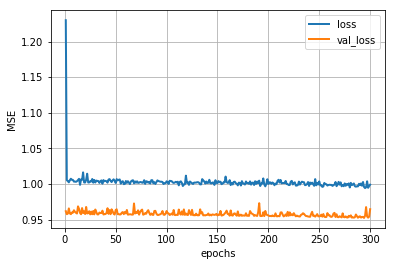

In [27]:
model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(100,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(50, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(25, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
### calculate gradients
loss = tf.keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
# We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

hist = model.fit(X_train_scaled, y_train, epochs=300, verbose=1, validation_data=(X_test_scaled, y_test))

# Comportamiento del error durante el tiempo
listaloss = []
listaval = []
for i in range(300):
    listaloss.append(hist.history['loss'][i])
    listaval.append(hist.history['val_loss'][i])

plt.plot(range(301)[1:],listaloss,label='loss', linewidth=2)
plt.plot(range(301)[1:],listaval,label='val_loss', linewidth=2)

plt.legend(['loss', 'val_loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.grid(1)
plt.show()


# gradientes una vez terminado el entrenamiento
postloss = tf.keras.losses.mean_squared_error(model.output,y_train)
postlistOfVariableTensors = model.trainable_weights
postgradients = K.gradients(postloss, postlistOfVariableTensors)
sess = K.get_session()
postevaluated_gradients = sess.run(postgradients,feed_dict={model.input:X_train_scaled.as_matrix()})
postevaluated_gradients = [gradient/len(y_train) for gradient in postevaluated_gradients]

Gradientes antes de entrenar(ultima capa oculta):


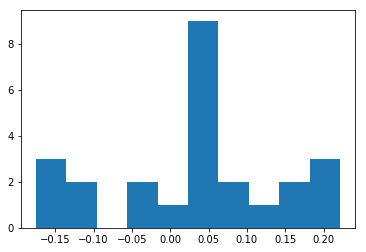

Gradientes despues de entrenar(ultima capa oculta):


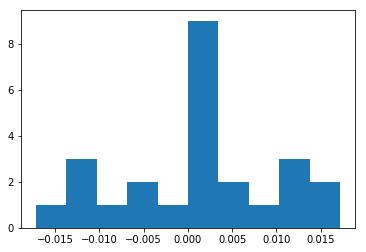

In [28]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[9])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[9])
plt.show()

Gradientes antes de entrenar(4ta capa oculta):


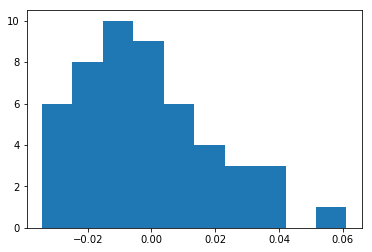

Gradientes despues de entrenar(4ta capa oculta):


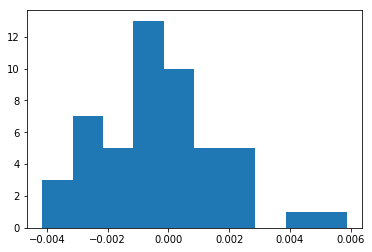

In [29]:
print("Gradientes antes de entrenar(4ta capa oculta):")
plt.hist(evaluated_gradients[7])
plt.show()
print("Gradientes despues de entrenar(4ta capa oculta):")
plt.hist(postevaluated_gradients[7])
plt.show()

Gradientes antes de entrenar(3ra capa oculta):


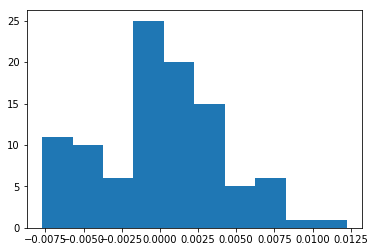

Gradientes despues de entrenar(3ra capa oculta):


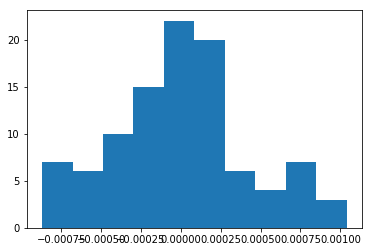

In [30]:
print("Gradientes antes de entrenar(3ra capa oculta):")
plt.hist(evaluated_gradients[5])
plt.show()
print("Gradientes despues de entrenar(3ra capa oculta):")
plt.hist(postevaluated_gradients[5])
plt.show()

Gradientes antes de entrenar(2da capa oculta):


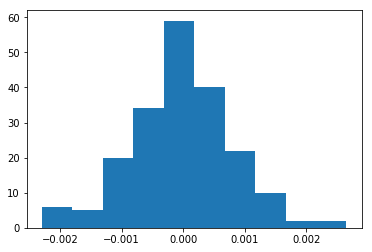

Gradientes despues de entrenar(2da capa oculta):


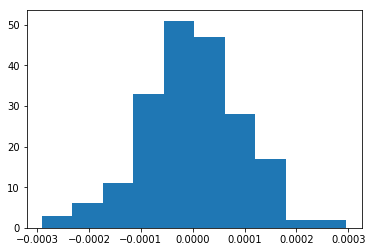

In [31]:
print("Gradientes antes de entrenar(2da capa oculta):")
plt.hist(evaluated_gradients[3])
plt.show()
print("Gradientes despues de entrenar(2da capa oculta):")
plt.hist(postevaluated_gradients[3])
plt.show()

A diferencia de los datos obtenidos en el punto anterior, se observa que el fenómeno de "gradiente desvaneciente" fue amortizado tanto paras los gradientes previos como post-entrenamientos. Aunque sigue sin presentar una mejora, presenta una mejor distribución de gradientes, mas alejados del cero.

e) En esta sección se volverá a utilizar la misma red, pero utilizando la función de activación ReLU para inicializadores de pesos uniformes y he uniformes.

## parte relu

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 824us/step - loss: 1.0009 - val_loss: 0.9587
Epoch 2/300
379/379 [==============================] - 0s 172us/step - loss: 1.0005 - val_loss: 0.9587
Epoch 3/300
379/379 [==============================] - 0s 164us/step - loss: 1.0004 - val_loss: 0.9587
Epoch 4/300
379/379 [==============================] - 0s 177us/step - loss: 1.0006 - val_loss: 0.9586
Epoch 5/300
379/379 [==============================] - 0s 156us/step - loss: 1.0003 - val_loss: 0.9586
Epoch 6/300
379/379 [==============================] - 0s 156us/step - loss: 1.0006 - val_loss: 0.9585
Epoch 7/300
379/379 [==============================] - 0s 153us/step - loss: 1.0011 - val_loss: 0.9586
Epoch 8/300
379/379 [==============================] - 0s 166us/step - loss: 1.0004 - val_loss: 0.9586
Epoch 9/300
379/379 [==============================] - 0s 172us/step - loss: 1.0001 - val_loss: 0.9586
Epoch 10/300
379/379 [=====

379/379 [==============================] - 0s 153us/step - loss: 1.0004 - val_loss: 0.9586
Epoch 80/300
379/379 [==============================] - 0s 143us/step - loss: 1.0003 - val_loss: 0.9586
Epoch 81/300
379/379 [==============================] - 0s 156us/step - loss: 1.0002 - val_loss: 0.9588
Epoch 82/300
379/379 [==============================] - 0s 156us/step - loss: 1.0006 - val_loss: 0.9586
Epoch 83/300
379/379 [==============================] - 0s 145us/step - loss: 1.0002 - val_loss: 0.9586
Epoch 84/300
379/379 [==============================] - 0s 158us/step - loss: 1.0001 - val_loss: 0.9586
Epoch 85/300
379/379 [==============================] - 0s 158us/step - loss: 1.0001 - val_loss: 0.9585
Epoch 86/300
379/379 [==============================] - 0s 145us/step - loss: 1.0004 - val_loss: 0.9587
Epoch 87/300
379/379 [==============================] - 0s 156us/step - loss: 1.0002 - val_loss: 0.9587
Epoch 88/300
379/379 [==============================] - 0s 159us/step - loss:

379/379 [==============================] - 0s 153us/step - loss: 1.0003 - val_loss: 0.9584
Epoch 158/300
379/379 [==============================] - 0s 156us/step - loss: 1.0002 - val_loss: 0.9585
Epoch 159/300
379/379 [==============================] - 0s 145us/step - loss: 1.0001 - val_loss: 0.9585
Epoch 160/300
379/379 [==============================] - 0s 158us/step - loss: 0.9998 - val_loss: 0.9585
Epoch 161/300
379/379 [==============================] - 0s 158us/step - loss: 1.0007 - val_loss: 0.9585
Epoch 162/300
379/379 [==============================] - 0s 151us/step - loss: 1.0002 - val_loss: 0.9585
Epoch 163/300
379/379 [==============================] - 0s 148us/step - loss: 0.9999 - val_loss: 0.9585
Epoch 164/300
379/379 [==============================] - 0s 164us/step - loss: 1.0002 - val_loss: 0.9585
Epoch 165/300
379/379 [==============================] - 0s 166us/step - loss: 1.0005 - val_loss: 0.9583
Epoch 166/300
379/379 [==============================] - 0s 148us/ste

379/379 [==============================] - 0s 161us/step - loss: 0.9995 - val_loss: 0.9580
Epoch 236/300
379/379 [==============================] - 0s 156us/step - loss: 0.9993 - val_loss: 0.9580
Epoch 237/300
379/379 [==============================] - 0s 164us/step - loss: 0.9996 - val_loss: 0.9580
Epoch 238/300
379/379 [==============================] - 0s 161us/step - loss: 0.9996 - val_loss: 0.9580
Epoch 239/300
379/379 [==============================] - 0s 161us/step - loss: 0.9995 - val_loss: 0.9580
Epoch 240/300
379/379 [==============================] - 0s 161us/step - loss: 0.9994 - val_loss: 0.9580
Epoch 241/300
379/379 [==============================] - 0s 161us/step - loss: 0.9997 - val_loss: 0.9580
Epoch 242/300
379/379 [==============================] - 0s 156us/step - loss: 0.9991 - val_loss: 0.9579
Epoch 243/300
379/379 [==============================] - 0s 164us/step - loss: 0.9995 - val_loss: 0.9580
Epoch 244/300
379/379 [==============================] - 0s 153us/ste

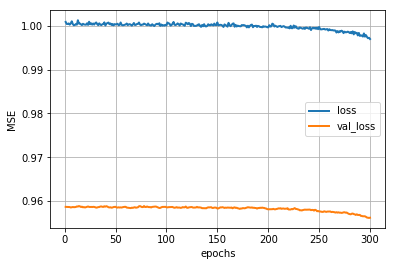

In [32]:
model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(100,  kernel_initializer='uniform',activation='relu'))
model.add(Dense(50, kernel_initializer='uniform',activation='relu'))
model.add(Dense(25, kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
### calculate gradients
loss = tf.keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
# We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

hist = model.fit(X_train_scaled, y_train, epochs=300, verbose=1, validation_data=(X_test_scaled, y_test))

# Comportamiento del error durante el tiempo
listaloss = []
listaval = []
for i in range(300):
    listaloss.append(hist.history['loss'][i])
    listaval.append(hist.history['val_loss'][i])

plt.plot(range(301)[1:],listaloss,label='loss', linewidth=2)
plt.plot(range(301)[1:],listaval,label='val_loss', linewidth=2)

plt.legend(['loss', 'val_loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.grid(1)
plt.show()


# gradientes una vez terminado el entrenamiento
postloss = tf.keras.losses.mean_squared_error(model.output,y_train)
postlistOfVariableTensors = model.trainable_weights
postgradients = K.gradients(postloss, postlistOfVariableTensors)
sess = K.get_session()
postevaluated_gradients = sess.run(postgradients,feed_dict={model.input:X_train_scaled.as_matrix()})
postevaluated_gradients = [gradient/len(y_train) for gradient in postevaluated_gradients]

Gradientes antes de entrenar(ultima capa oculta):


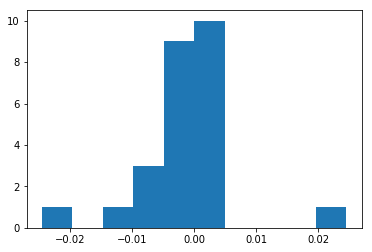

Gradientes despues de entrenar(ultima capa oculta):


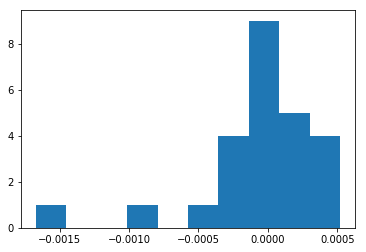

In [33]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[9])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[9])
plt.show()

Gradientes antes de entrenar(4ta capa oculta):


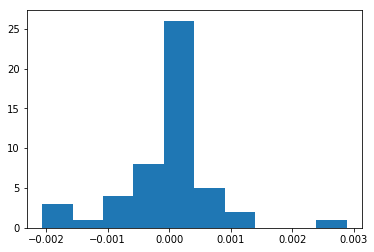

Gradientes despues de entrenar(4ta capa oculta):


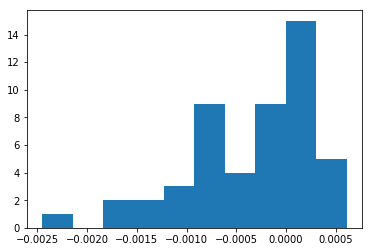

In [34]:
print("Gradientes antes de entrenar(4ta capa oculta):")
plt.hist(evaluated_gradients[7])
plt.show()
print("Gradientes despues de entrenar(4ta capa oculta):")
plt.hist(postevaluated_gradients[7])
plt.show()

Gradientes antes de entrenar(3ra capa oculta):


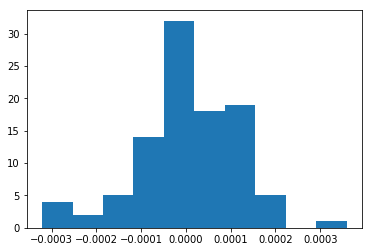

Gradientes despues de entrenar(3ra capa oculta):


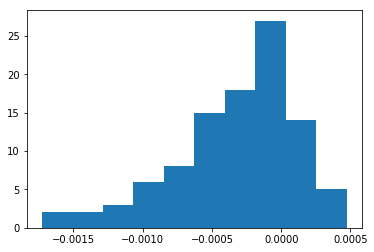

In [35]:
print("Gradientes antes de entrenar(3ra capa oculta):")
plt.hist(evaluated_gradients[5])
plt.show()
print("Gradientes despues de entrenar(3ra capa oculta):")
plt.hist(postevaluated_gradients[5])
plt.show()

Gradientes antes de entrenar(2da capa oculta):


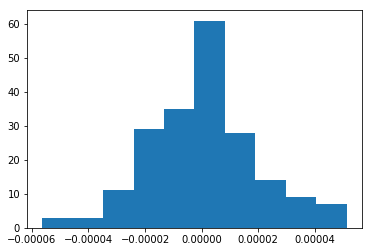

Gradientes despues de entrenar(2da capa oculta):


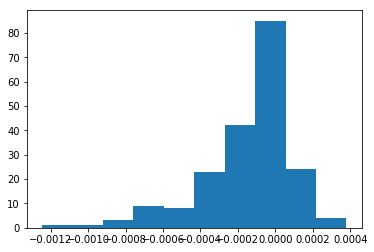

In [36]:
print("Gradientes antes de entrenar(2da capa oculta):")
plt.hist(evaluated_gradients[3])
plt.show()
print("Gradientes despues de entrenar(2da capa oculta):")
plt.hist(postevaluated_gradients[3])
plt.show()

Como se aprecia en el gráfico de loss, este sigue sin mantener un estado aceptable. Si nos enfocamos en el peso de los gradientes post-entrenamiento, observaremos que estos estan mas cargados al 0, manteniendo el estado de gradientes desvanecientes. Además no se hizo uso de momentum anteriormente, por lo que podríamos deducir que la red llegó a un mínimo local o punto silla el cual no puede escapar de ahí.

## parte he

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 866us/step - loss: 1.2953 - val_loss: 0.5238
Epoch 2/300
379/379 [==============================] - 0s 180us/step - loss: 0.2926 - val_loss: 0.4082
Epoch 3/300
379/379 [==============================] - 0s 177us/step - loss: 0.1894 - val_loss: 0.3280
Epoch 4/300
379/379 [==============================] - 0s 182us/step - loss: 0.1539 - val_loss: 0.3328
Epoch 5/300
379/379 [==============================] - 0s 166us/step - loss: 0.1301 - val_loss: 0.2911
Epoch 6/300
379/379 [==============================] - 0s 161us/step - loss: 0.1089 - val_loss: 0.2592
Epoch 7/300
379/379 [==============================] - 0s 180us/step - loss: 0.0990 - val_loss: 0.2596
Epoch 8/300
379/379 [==============================] - 0s 161us/step - loss: 0.0906 - val_loss: 0.2641
Epoch 9/300
379/379 [==============================] - 0s 153us/step - loss: 0.0813 - val_loss: 0.2638
Epoch 10/300
379/379 [=====

379/379 [==============================] - 0s 158us/step - loss: 0.0134 - val_loss: 0.1864
Epoch 80/300
379/379 [==============================] - 0s 161us/step - loss: 0.0136 - val_loss: 0.1944
Epoch 81/300
379/379 [==============================] - 0s 177us/step - loss: 0.0127 - val_loss: 0.1842
Epoch 82/300
379/379 [==============================] - 0s 174us/step - loss: 0.0120 - val_loss: 0.1870
Epoch 83/300
379/379 [==============================] - 0s 161us/step - loss: 0.0120 - val_loss: 0.1864
Epoch 84/300
379/379 [==============================] - 0s 158us/step - loss: 0.0122 - val_loss: 0.1890
Epoch 85/300
379/379 [==============================] - 0s 174us/step - loss: 0.0117 - val_loss: 0.1862
Epoch 86/300
379/379 [==============================] - 0s 153us/step - loss: 0.0129 - val_loss: 0.1862
Epoch 87/300
379/379 [==============================] - 0s 156us/step - loss: 0.0117 - val_loss: 0.1888
Epoch 88/300
379/379 [==============================] - 0s 161us/step - loss:

379/379 [==============================] - 0s 164us/step - loss: 0.0057 - val_loss: 0.1837
Epoch 158/300
379/379 [==============================] - 0s 164us/step - loss: 0.0060 - val_loss: 0.1922
Epoch 159/300
379/379 [==============================] - 0s 161us/step - loss: 0.0065 - val_loss: 0.1872
Epoch 160/300
379/379 [==============================] - 0s 166us/step - loss: 0.0058 - val_loss: 0.1856
Epoch 161/300
379/379 [==============================] - 0s 158us/step - loss: 0.0065 - val_loss: 0.1835
Epoch 162/300
379/379 [==============================] - 0s 169us/step - loss: 0.0060 - val_loss: 0.1884
Epoch 163/300
379/379 [==============================] - 0s 177us/step - loss: 0.0057 - val_loss: 0.1876
Epoch 164/300
379/379 [==============================] - 0s 158us/step - loss: 0.0060 - val_loss: 0.1843
Epoch 165/300
379/379 [==============================] - 0s 161us/step - loss: 0.0065 - val_loss: 0.1893
Epoch 166/300
379/379 [==============================] - 0s 161us/ste

379/379 [==============================] - 0s 166us/step - loss: 0.0038 - val_loss: 0.1900
Epoch 236/300
379/379 [==============================] - 0s 161us/step - loss: 0.0044 - val_loss: 0.1901
Epoch 237/300
379/379 [==============================] - 0s 166us/step - loss: 0.0035 - val_loss: 0.1898
Epoch 238/300
379/379 [==============================] - 0s 164us/step - loss: 0.0054 - val_loss: 0.1941
Epoch 239/300
379/379 [==============================] - 0s 177us/step - loss: 0.0052 - val_loss: 0.1930
Epoch 240/300
379/379 [==============================] - 0s 172us/step - loss: 0.0044 - val_loss: 0.1883
Epoch 241/300
379/379 [==============================] - 0s 153us/step - loss: 0.0041 - val_loss: 0.1877
Epoch 242/300
379/379 [==============================] - 0s 166us/step - loss: 0.0038 - val_loss: 0.1933
Epoch 243/300
379/379 [==============================] - 0s 158us/step - loss: 0.0046 - val_loss: 0.1934
Epoch 244/300
379/379 [==============================] - 0s 161us/ste

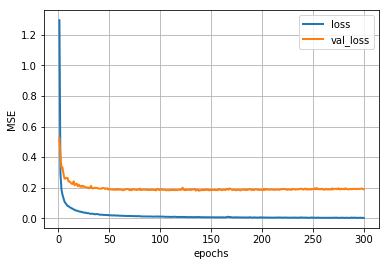

In [37]:
model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(100,  kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(50, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(25, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
### calculate gradients
loss = tf.keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
# We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

hist = model.fit(X_train_scaled, y_train, epochs=300, verbose=1, validation_data=(X_test_scaled, y_test))

# Comportamiento del error durante el tiempo
listaloss = []
listaval = []
for i in range(300):
    listaloss.append(hist.history['loss'][i])
    listaval.append(hist.history['val_loss'][i])

plt.plot(range(301)[1:],listaloss,label='loss', linewidth=2)
plt.plot(range(301)[1:],listaval,label='val_loss', linewidth=2)

plt.legend(['loss', 'val_loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.grid(1)
plt.show()


# gradientes una vez terminado el entrenamiento
postloss = tf.keras.losses.mean_squared_error(model.output,y_train)
postlistOfVariableTensors = model.trainable_weights
postgradients = K.gradients(postloss, postlistOfVariableTensors)
sess = K.get_session()
postevaluated_gradients = sess.run(postgradients,feed_dict={model.input:X_train_scaled.as_matrix()})
postevaluated_gradients = [gradient/len(y_train) for gradient in postevaluated_gradients]

Gradientes antes de entrenar(ultima capa oculta):


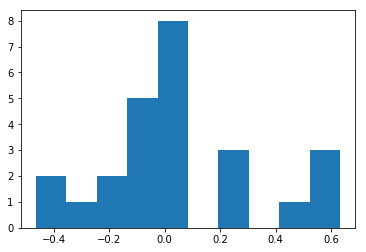

Gradientes despues de entrenar(ultima capa oculta):


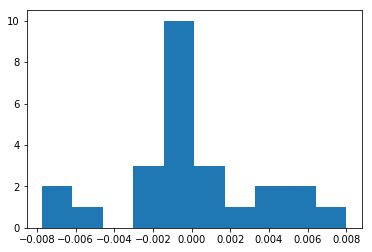

In [38]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[9])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[9])
plt.show()

Gradientes antes de entrenar(ultima capa oculta):


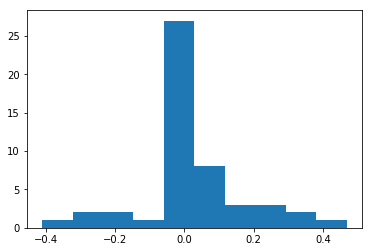

Gradientes despues de entrenar(ultima capa oculta):


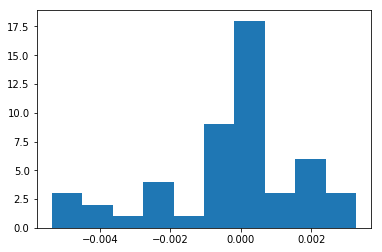

In [39]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[7])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[7])
plt.show()

Gradientes antes de entrenar(ultima capa oculta):


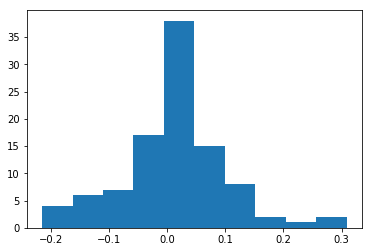

Gradientes despues de entrenar(ultima capa oculta):


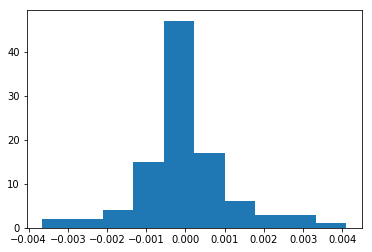

In [40]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[5])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[5])
plt.show()

Gradientes antes de entrenar(ultima capa oculta):


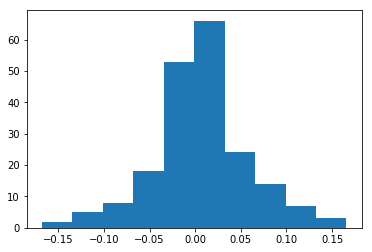

Gradientes despues de entrenar(ultima capa oculta):


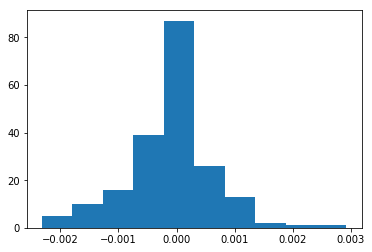

In [41]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[3])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[3])
plt.show()

Para este caso, si bien hay rastros del fenómeno que nos ha atormentado durante toda la ejecución de este notebook, se observa una gran mejora en comparación a los ejemplos anteriores, donde la gran diferencia fue el cambiar la iniciación de los pesos de cada capa. Nuevamente, el loss de entrenamiento sigue disminuyendo, mientras que la pérdida de prueba se mantiene constante. Esto puede deberse a que el dataframe es muy pequeño, y al realizar un "split" para validarlo, este no es capaz de responder a cada prueba.

e) A continuación, se modela una red con la intención de obtener mejores resultados que la red no profunda al inicio de la pregunta. En esta se inician los pesos mediante glorot, con funcion de activación sigmoid y una relu en la primera capa, además de utilizar "SGD" con "mse", momentun de 0.9 y nesterov activado.

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 1ms/step - loss: 0.8246 - val_loss: 0.6227
Epoch 2/300
379/379 [==============================] - 0s 188us/step - loss: 0.2895 - val_loss: 0.3468
Epoch 3/300
379/379 [==============================] - 0s 182us/step - loss: 0.1730 - val_loss: 0.3342
Epoch 4/300
379/379 [==============================] - 0s 161us/step - loss: 0.1384 - val_loss: 0.2563
Epoch 5/300
379/379 [==============================] - 0s 182us/step - loss: 0.1185 - val_loss: 0.2055
Epoch 6/300
379/379 [==============================] - 0s 180us/step - loss: 0.0916 - val_loss: 0.1976
Epoch 7/300
379/379 [==============================] - 0s 177us/step - loss: 0.0785 - val_loss: 0.1820
Epoch 8/300
379/379 [==============================] - 0s 182us/step - loss: 0.0673 - val_loss: 0.2141
Epoch 9/300
379/379 [==============================] - 0s 185us/step - loss: 0.0589 - val_loss: 0.1669
Epoch 10/300
379/379 [=======

379/379 [==============================] - 0s 177us/step - loss: 0.0071 - val_loss: 0.1776
Epoch 80/300
379/379 [==============================] - 0s 188us/step - loss: 0.0058 - val_loss: 0.1895
Epoch 81/300
379/379 [==============================] - 0s 188us/step - loss: 0.0059 - val_loss: 0.1761
Epoch 82/300
379/379 [==============================] - 0s 164us/step - loss: 0.0061 - val_loss: 0.1816
Epoch 83/300
379/379 [==============================] - 0s 180us/step - loss: 0.0062 - val_loss: 0.1778
Epoch 84/300
379/379 [==============================] - 0s 169us/step - loss: 0.0058 - val_loss: 0.1756
Epoch 85/300
379/379 [==============================] - 0s 174us/step - loss: 0.0059 - val_loss: 0.1786
Epoch 86/300
379/379 [==============================] - 0s 177us/step - loss: 0.0061 - val_loss: 0.1711
Epoch 87/300
379/379 [==============================] - 0s 166us/step - loss: 0.0057 - val_loss: 0.1823
Epoch 88/300
379/379 [==============================] - 0s 158us/step - loss:

379/379 [==============================] - 0s 174us/step - loss: 0.0026 - val_loss: 0.1743
Epoch 158/300
379/379 [==============================] - 0s 166us/step - loss: 0.0029 - val_loss: 0.1816
Epoch 159/300
379/379 [==============================] - 0s 185us/step - loss: 0.0026 - val_loss: 0.1765
Epoch 160/300
379/379 [==============================] - 0s 164us/step - loss: 0.0026 - val_loss: 0.1788
Epoch 161/300
379/379 [==============================] - 0s 169us/step - loss: 0.0024 - val_loss: 0.1863
Epoch 162/300
379/379 [==============================] - 0s 193us/step - loss: 0.0027 - val_loss: 0.1797
Epoch 163/300
379/379 [==============================] - 0s 180us/step - loss: 0.0029 - val_loss: 0.1701
Epoch 164/300
379/379 [==============================] - 0s 166us/step - loss: 0.0027 - val_loss: 0.1736
Epoch 165/300
379/379 [==============================] - 0s 172us/step - loss: 0.0023 - val_loss: 0.1714
Epoch 166/300
379/379 [==============================] - 0s 177us/ste

379/379 [==============================] - 0s 177us/step - loss: 0.0017 - val_loss: 0.1728
Epoch 236/300
379/379 [==============================] - 0s 166us/step - loss: 0.0015 - val_loss: 0.1770
Epoch 237/300
379/379 [==============================] - 0s 161us/step - loss: 0.0013 - val_loss: 0.1709
Epoch 238/300
379/379 [==============================] - 0s 164us/step - loss: 0.0012 - val_loss: 0.1753
Epoch 239/300
379/379 [==============================] - 0s 166us/step - loss: 0.0014 - val_loss: 0.1788
Epoch 240/300
379/379 [==============================] - 0s 172us/step - loss: 0.0017 - val_loss: 0.1749
Epoch 241/300
379/379 [==============================] - 0s 180us/step - loss: 0.0013 - val_loss: 0.1766
Epoch 242/300
379/379 [==============================] - 0s 180us/step - loss: 0.0013 - val_loss: 0.1779
Epoch 243/300
379/379 [==============================] - 0s 180us/step - loss: 0.0017 - val_loss: 0.1818
Epoch 244/300
379/379 [==============================] - 0s 166us/ste

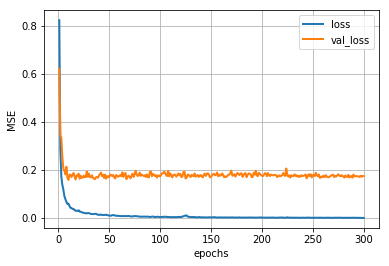

In [43]:
model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dense(100,  kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dense(50, kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dense(25, kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,loss='mean_squared_error')
### calculate gradients
loss = tf.keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
# We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

hist = model.fit(X_train_scaled, y_train, epochs=300, verbose=1, validation_data=(X_test_scaled, y_test))

# Comportamiento del error durante el tiempo
listaloss = []
listaval = []
for i in range(300):
    listaloss.append(hist.history['loss'][i])
    listaval.append(hist.history['val_loss'][i])

plt.plot(range(301)[1:],listaloss,label='loss', linewidth=2)
plt.plot(range(301)[1:],listaval,label='val_loss', linewidth=2)

plt.legend(['loss', 'val_loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.grid(1)
plt.show()


# gradientes una vez terminado el entrenamiento
postloss = tf.keras.losses.mean_squared_error(model.output,y_train)
postlistOfVariableTensors = model.trainable_weights
postgradients = K.gradients(postloss, postlistOfVariableTensors)
sess = K.get_session()
postevaluated_gradients = sess.run(postgradients,feed_dict={model.input:X_train_scaled.as_matrix()})
postevaluated_gradients = [gradient/len(y_train) for gradient in postevaluated_gradients]

Gradientes antes de entrenar(ultima capa oculta):


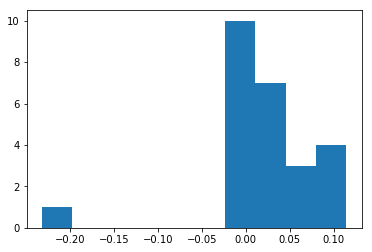

Gradientes despues de entrenar(ultima capa oculta):


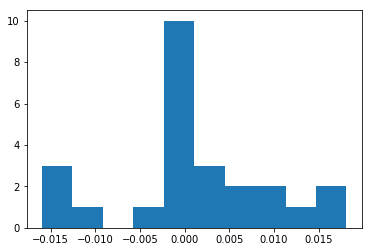

In [48]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[9])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[9])
plt.show()

Gradientes antes de entrenar(ultima capa oculta):


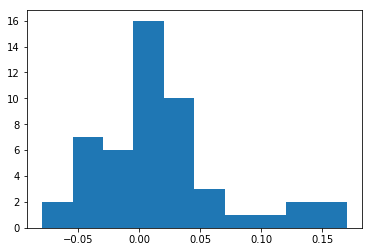

Gradientes despues de entrenar(ultima capa oculta):


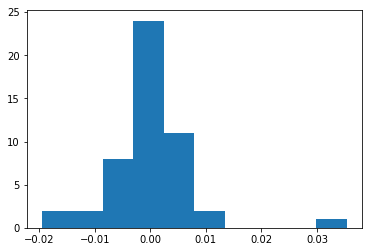

In [49]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[7])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[7])
plt.show()

Gradientes antes de entrenar(ultima capa oculta):


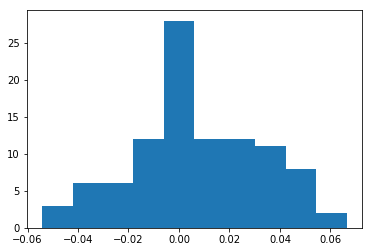

Gradientes despues de entrenar(ultima capa oculta):


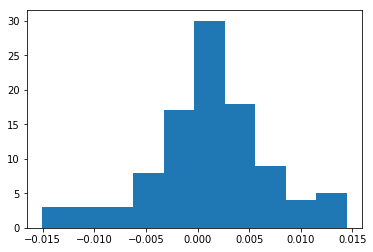

In [50]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[5])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[5])
plt.show()

Gradientes antes de entrenar(ultima capa oculta):


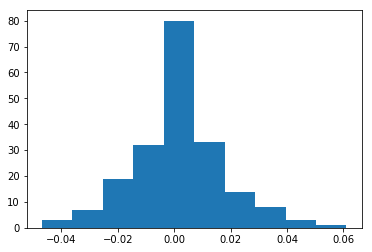

Gradientes despues de entrenar(ultima capa oculta):


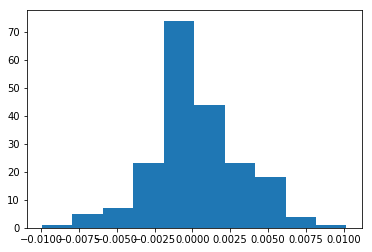

In [51]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[3])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[3])
plt.show()

Por los resultados, se deduce que el desempeño de esta red fue mejor que la red poco profunda y la anteriormente concebida, con la excepción de que en esta converge mucho mas rápido a 0, aún así, la pérdida de evaluación sigue manteniendose constante, aunque esta vez, esta perdida ha sido la mejor de las 3 redes exitosas.

f) En esta parte, se utilizarán la misma cantidad de neuronas utilizadas, pero con la peculiaridad de que todas estarán contenidas en una sola capa oculta.

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 1ms/step - loss: 0.8691 - val_loss: 0.7282
Epoch 2/300
379/379 [==============================] - 0s 140us/step - loss: 0.5974 - val_loss: 0.6103
Epoch 3/300
379/379 [==============================] - 0s 124us/step - loss: 0.4609 - val_loss: 0.5501
Epoch 4/300
379/379 [==============================] - 0s 135us/step - loss: 0.3819 - val_loss: 0.5126
Epoch 5/300
379/379 [==============================] - 0s 129us/step - loss: 0.3301 - val_loss: 0.4796
Epoch 6/300
379/379 [==============================] - 0s 127us/step - loss: 0.2920 - val_loss: 0.4512
Epoch 7/300
379/379 [==============================] - 0s 124us/step - loss: 0.2634 - val_loss: 0.4269
Epoch 8/300
379/379 [==============================] - 0s 127us/step - loss: 0.2403 - val_loss: 0.4058
Epoch 9/300
379/379 [==============================] - 0s 127us/step - loss: 0.2222 - val_loss: 0.3878
Epoch 10/300
379/379 [=======

379/379 [==============================] - 0s 132us/step - loss: 0.0965 - val_loss: 0.2298
Epoch 80/300
379/379 [==============================] - 0s 121us/step - loss: 0.0958 - val_loss: 0.2306
Epoch 81/300
379/379 [==============================] - 0s 124us/step - loss: 0.0955 - val_loss: 0.2281
Epoch 82/300
379/379 [==============================] - 0s 119us/step - loss: 0.0949 - val_loss: 0.2283
Epoch 83/300
379/379 [==============================] - 0s 121us/step - loss: 0.0943 - val_loss: 0.2294
Epoch 84/300
379/379 [==============================] - 0s 124us/step - loss: 0.0944 - val_loss: 0.2274
Epoch 85/300
379/379 [==============================] - 0s 121us/step - loss: 0.0942 - val_loss: 0.2249
Epoch 86/300
379/379 [==============================] - 0s 127us/step - loss: 0.0938 - val_loss: 0.2257
Epoch 87/300
379/379 [==============================] - 0s 121us/step - loss: 0.0929 - val_loss: 0.2256
Epoch 88/300
379/379 [==============================] - 0s 129us/step - loss:

379/379 [==============================] - 0s 124us/step - loss: 0.0735 - val_loss: 0.2058
Epoch 158/300
379/379 [==============================] - 0s 116us/step - loss: 0.0728 - val_loss: 0.2032
Epoch 159/300
379/379 [==============================] - 0s 132us/step - loss: 0.0731 - val_loss: 0.2069
Epoch 160/300
379/379 [==============================] - 0s 121us/step - loss: 0.0734 - val_loss: 0.2061
Epoch 161/300
379/379 [==============================] - 0s 124us/step - loss: 0.0727 - val_loss: 0.2057
Epoch 162/300
379/379 [==============================] - 0s 121us/step - loss: 0.0723 - val_loss: 0.2019
Epoch 163/300
379/379 [==============================] - 0s 129us/step - loss: 0.0722 - val_loss: 0.2033
Epoch 164/300
379/379 [==============================] - 0s 124us/step - loss: 0.0722 - val_loss: 0.2022
Epoch 165/300
379/379 [==============================] - 0s 121us/step - loss: 0.0719 - val_loss: 0.2025
Epoch 166/300
379/379 [==============================] - 0s 119us/ste

379/379 [==============================] - 0s 129us/step - loss: 0.0603 - val_loss: 0.1931
Epoch 236/300
379/379 [==============================] - 0s 124us/step - loss: 0.0599 - val_loss: 0.1930
Epoch 237/300
379/379 [==============================] - 0s 127us/step - loss: 0.0598 - val_loss: 0.1916
Epoch 238/300
379/379 [==============================] - 0s 132us/step - loss: 0.0599 - val_loss: 0.1915
Epoch 239/300
379/379 [==============================] - 0s 137us/step - loss: 0.0601 - val_loss: 0.1944
Epoch 240/300
379/379 [==============================] - 0s 132us/step - loss: 0.0597 - val_loss: 0.1936
Epoch 241/300
379/379 [==============================] - 0s 124us/step - loss: 0.0596 - val_loss: 0.1915
Epoch 242/300
379/379 [==============================] - 0s 132us/step - loss: 0.0589 - val_loss: 0.1921
Epoch 243/300
379/379 [==============================] - 0s 124us/step - loss: 0.0591 - val_loss: 0.1906
Epoch 244/300
379/379 [==============================] - 0s 129us/ste

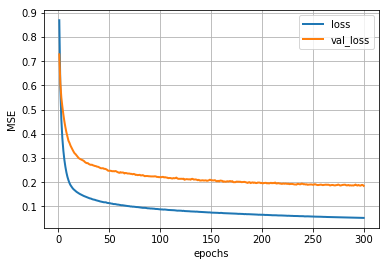

In [59]:
model = Sequential()
model.add(Dense(775, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

loss = tf.keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
# We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

hist = model.fit(X_train_scaled, y_train, epochs=300, verbose=1, validation_data=(X_test_scaled, y_test))

# Comportamiento del error durante el tiempo
listaloss = []
listaval = []
for i in range(300):
    listaloss.append(hist.history['loss'][i])
    listaval.append(hist.history['val_loss'][i])

plt.plot(range(301)[1:],listaloss,label='loss', linewidth=2)
plt.plot(range(301)[1:],listaval,label='val_loss', linewidth=2)

plt.legend(['loss', 'val_loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.grid(1)
plt.show()


# gradientes una vez terminado el entrenamiento
postloss = tf.keras.losses.mean_squared_error(model.output,y_train)
postlistOfVariableTensors = model.trainable_weights
postgradients = K.gradients(postloss, postlistOfVariableTensors)
sess = K.get_session()
postevaluated_gradients = sess.run(postgradients,feed_dict={model.input:X_train_scaled.as_matrix()})
postevaluated_gradients = [gradient/len(y_train) for gradient in postevaluated_gradients]

Gradientes antes de entrenar(ultima capa oculta):


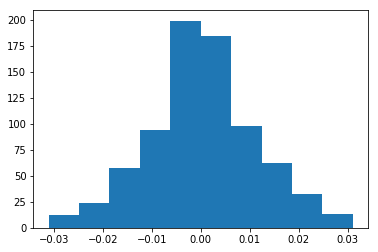

Gradientes despues de entrenar(ultima capa oculta):


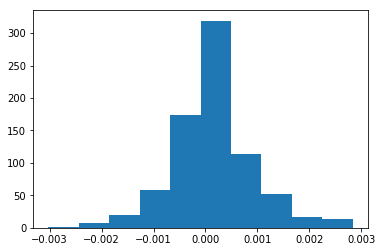

In [57]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[1])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[1])
plt.show()

Fuera de observar lo mismo que se ha repetido durante todo el ejericio, se demuestra lo planteado por el profesor, donde mas cantidad de neuronas, mayor precisión, dado que los resultados obtenidos son similares a los adquiridos por la red profunda ejecutada anteriormente utilizando exactamente la misma cantidad de neuronas en una sola capa.